## CNN to classify hourses and humans

In [1]:
from tensorflow.keras.models import Sequential

In [2]:
pwd

'C:\\Users\\sysadmin\\ai-research-dev\\assignments'

In [12]:
training_dir = 'C:\\Users\\sysadmin\\horse-or-human'
val_dir = 'C:\\Users\\sysadmin\\validation-horse-or-human'

In [4]:
model = Sequential()

In [5]:
from tensorflow.keras.layers import Conv2D, Activation, MaxPool2D

### here the prescribed size for the image is 300 x 300 so we shall stick to that
### the further process is adding convulution filter, activation will remain as relu and maxpooling of 2 x 2 we shall apply
### make 4 pass out of the model

In [9]:
model.add(Conv2D(32, (3,3), input_shape=(300,300,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(16, (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(16, (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(16, (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

### next step is to flatten

In [10]:
from tensorflow.keras.layers import Flatten

model.add(Flatten())

In [11]:
from tensorflow.keras.layers import Dense, Dropout

In [14]:
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(1))
model.add(Activation('sigmoid'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 298, 298, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 296, 296, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 296, 296, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 294, 294, 32)      9248      
_________________________________________________________________
activation_2 (Activation)    (None, 294, 294, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 147, 147, 32)      0

# now we need to compile our model and here we shall have the old rmsprop as our optimizer and user accurary as metrics

In [16]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'rmsprop',
    metrics = ['accuracy']
)

## now we shall get the data and user ImageGenerator for that

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 15,
    zoom_range=0.1
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)

In [20]:
batch_size = 32

In [21]:
train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size=(300,300),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = train_datagen.flow_from_directory(
    val_dir,
    target_size=(300,300),
    batch_size=batch_size,
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


## Now we train the model

In [23]:
model.fit(
    train_generator,
    steps_per_epoch=1027//batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=256//batch_size
)

Epoch 1/10
32/32 [==============================] - 227s 7s/step - loss: 0.1603 - accuracy: 0.9518 - val_loss: 1.3403 - val_accuracy: 0.8750
Epoch 2/10
32/32 [==============================] - 234s 7s/step - loss: 0.0957 - accuracy: 0.9749 - val_loss: 1.2718 - val_accuracy: 0.8750
Epoch 3/10
32/32 [==============================] - 231s 7s/step - loss: 0.2240 - accuracy: 0.9377 - val_loss: 1.1860 - val_accuracy: 0.8203
Epoch 4/10
32/32 [==============================] - 226s 7s/step - loss: 0.1220 - accuracy: 0.9638 - val_loss: 1.4366 - val_accuracy: 0.8320
Epoch 5/10
32/32 [==============================] - 257s 8s/step - loss: 0.1302 - accuracy: 0.9769 - val_loss: 1.4023 - val_accuracy: 0.8750
Epoch 6/10
32/32 [==============================] - 254s 8s/step - loss: 0.1263 - accuracy: 0.9698 - val_loss: 0.9984 - val_accuracy: 0.8828
Epoch 7/10
32/32 [==============================] - 258s 8s/step - loss: 0.1468 - accuracy: 0.9688 - val_loss: 2.1848 - val_accuracy: 0.8789
Epoch 8/10
32

In [24]:
model.save_weights('horse_human.h5')

In [26]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img

In [74]:
def load_image(image):
    img = load_img(image)
    x = img_to_array(img.resize([300,300]))
    x = x.reshape((1,) + x.shape)
    return x, img

In [83]:
img = load_image('horse_test2.jpg')
img2 = load_image('horse_test4.jpg')
img3 = load_image('humans_test5.jpg')
img4 = load_image('humans_test3.jpg')

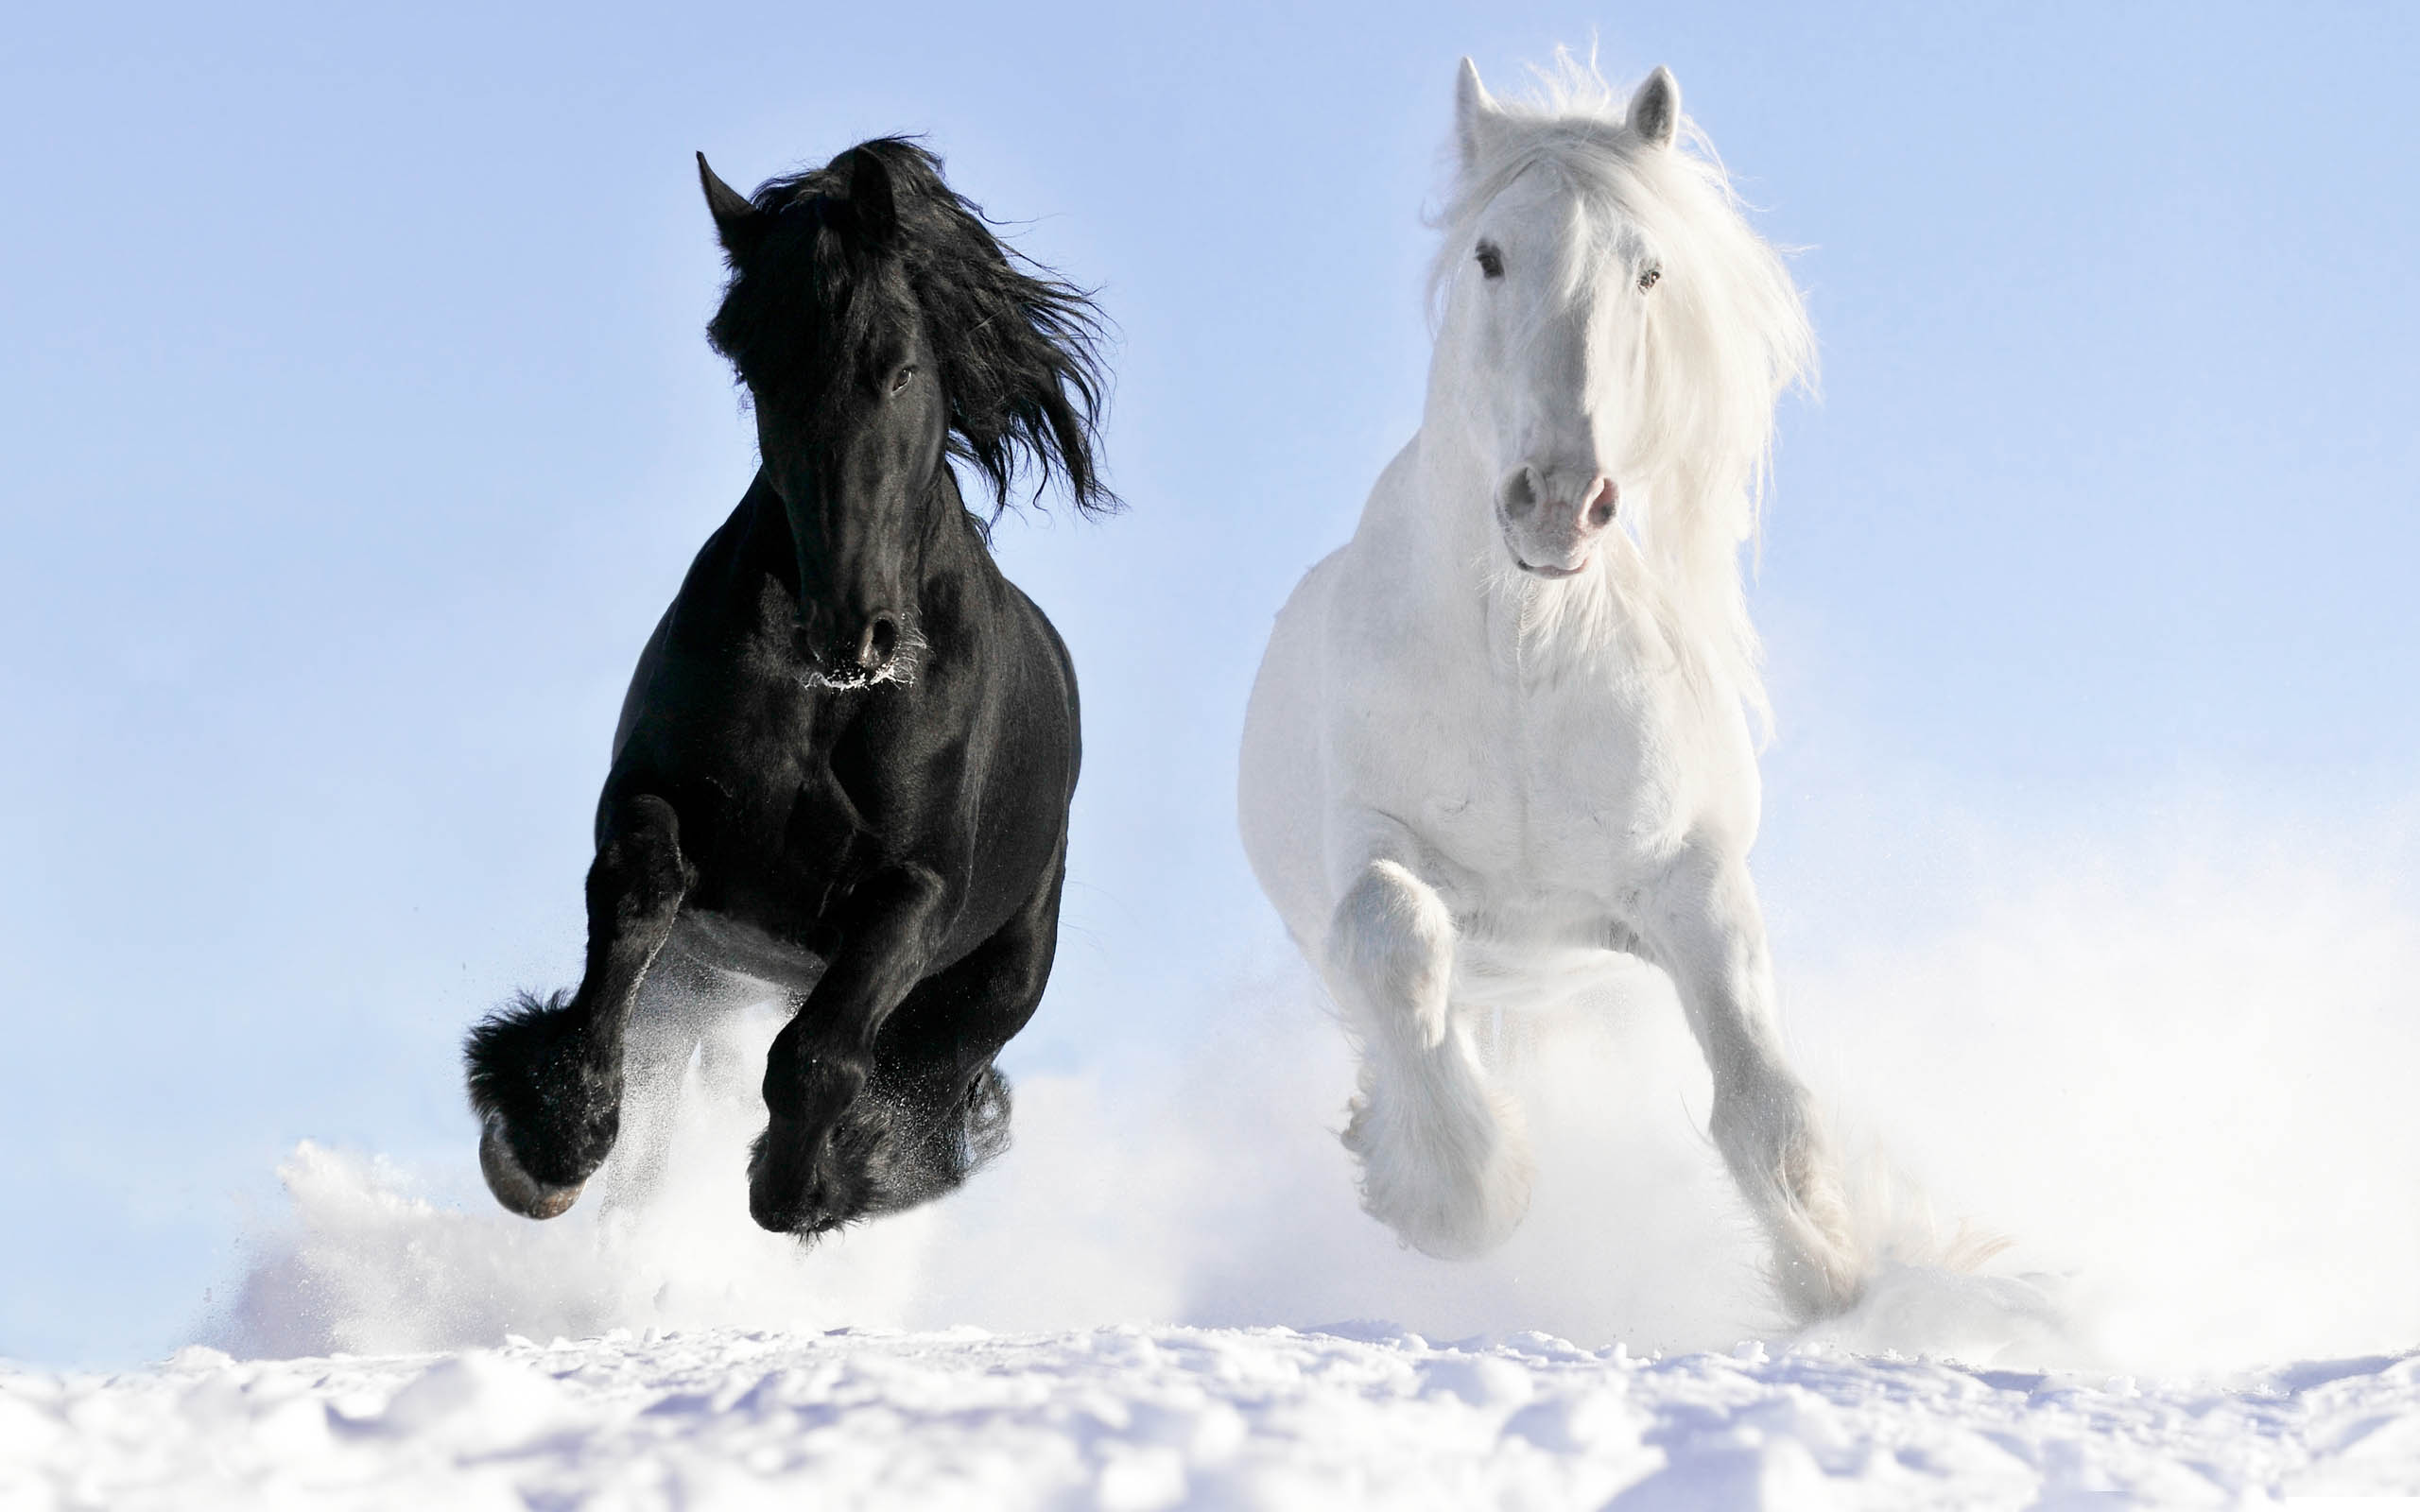

In [84]:
img[1]

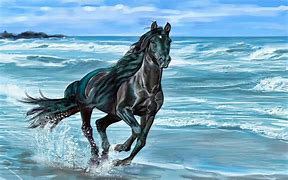

In [85]:
img2[1]

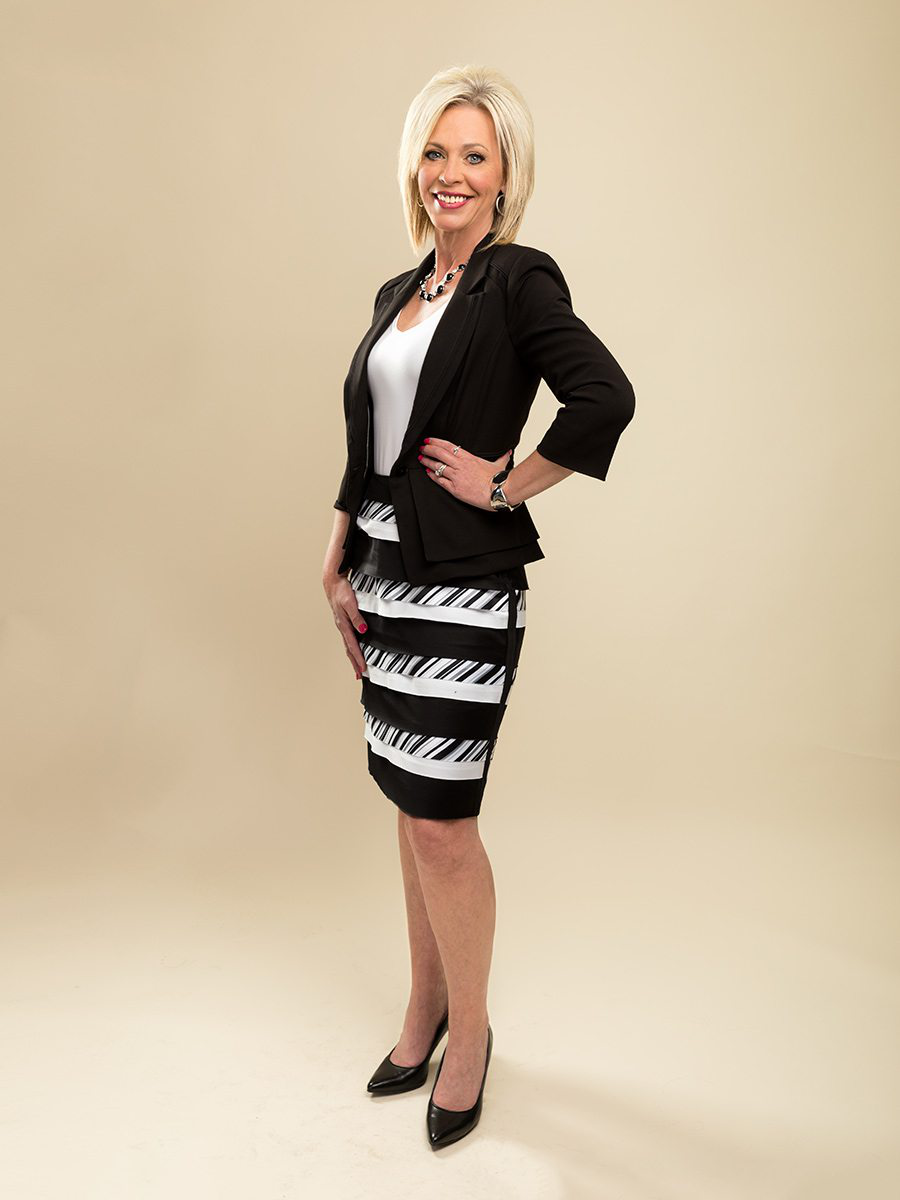

In [86]:
img3[1]

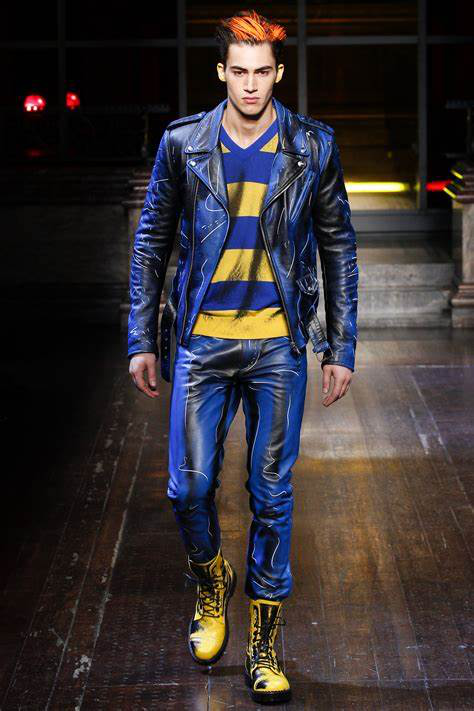

In [87]:
img4[1]

In [45]:
def predict_class(x):
    if int(model.predict(x)[0][0]) == 0:
        print('Horse')
    else:
        print('Human')

In [89]:
for i in [img, img2, img3, img4]:
    predict_class(i[0])

Horse
Horse
Human
Human
